<a href="https://colab.research.google.com/github/code-xD/QGT_Simulations/blob/main/QGT_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np

# Make data.
pi = np.pi
e = np.e

In [18]:
class QuantumGame:
    def __init__(self, N):
        self.channels = self.channelBasis(N)
        self.players = self.channelBasis(2)
        self.N = N
        self.psiI = np.kron(self.normalizedSum(self.players), self.normalizedSum(self.channels))
        self.movesB = np.asarray([])
        self.movesE = np.asarray([])
        self.psiF = self.psiI


    def unitary(self, lam, phi=0):
        U = np.array([[np.exp(1j*phi) * np.cos(lam), -1 * np.sin(lam)], [ np.sin(lam), np.exp(-1j*phi) * np.cos(lam)]])
        return U

    def channelBasis(self, dim):
        basis = []
        for i in range(0, dim):
            channel = np.zeros((dim,1))
            channel[i] = 1
            basis.append(channel)
        basis = np.asarray(basis, dtype='complex128')
        return basis

    def normalizedSum(self, channels):
        return 1/np.sqrt(np.size(channels, axis=1)) * np.sum(channels, axis = 1)

    def projector(self, qubit):
        return np.dot(qubit, np.transpose(qubit))

    def stratMatrix(self, moves):
        strat = []
        for i in range(self.N):
            strat.append(np.kron(moves[i], self.projector(self.channels[i])))
        return np.sum(strat,axis=0)

    def magQubit(self, p, c):
        mag = np.dot(np.transpose(np.kron(self.players[p], self.channels[c])), self.psiF).item()
        mag = np.square(np.absolute(mag))
        mag = mag - 1/(2*self.N)
        mag = np.around(mag, decimals=8)
        return mag
    
    def signedMagQubit(self, p, c):
        mag = np.sign(self.magQubit(p, c))
        return mag


    def createRealMoves(self, angles):
        moves = []
        for angle in angles:
            moves.append(self.unitary(angle))
        moves = np.asarray(moves)
        return moves

    def createQuantumMoves(self, quaternions):
        moves = []
        for quat in quaternions:
            moves.append(self.unitary(quat[0], quat[1]))
        moves = np.asarray(moves)
        return moves

    def calculateOutcome(self):
        UB = self.stratMatrix(self.movesB)
        UE = self.stratMatrix(self.movesE)
        self.psiF = np.dot(np.dot(UE, UB), self.psiI)


In [19]:
# Classes default call
Q1 = QuantumGame(1)
Q1.movesB = Q1.createRealMoves([pi/4])
Q1.movesE = Q1.createRealMoves([-pi/4])
Q1.calculateOutcome()
Q1.magQubit(0,0)

-0.0

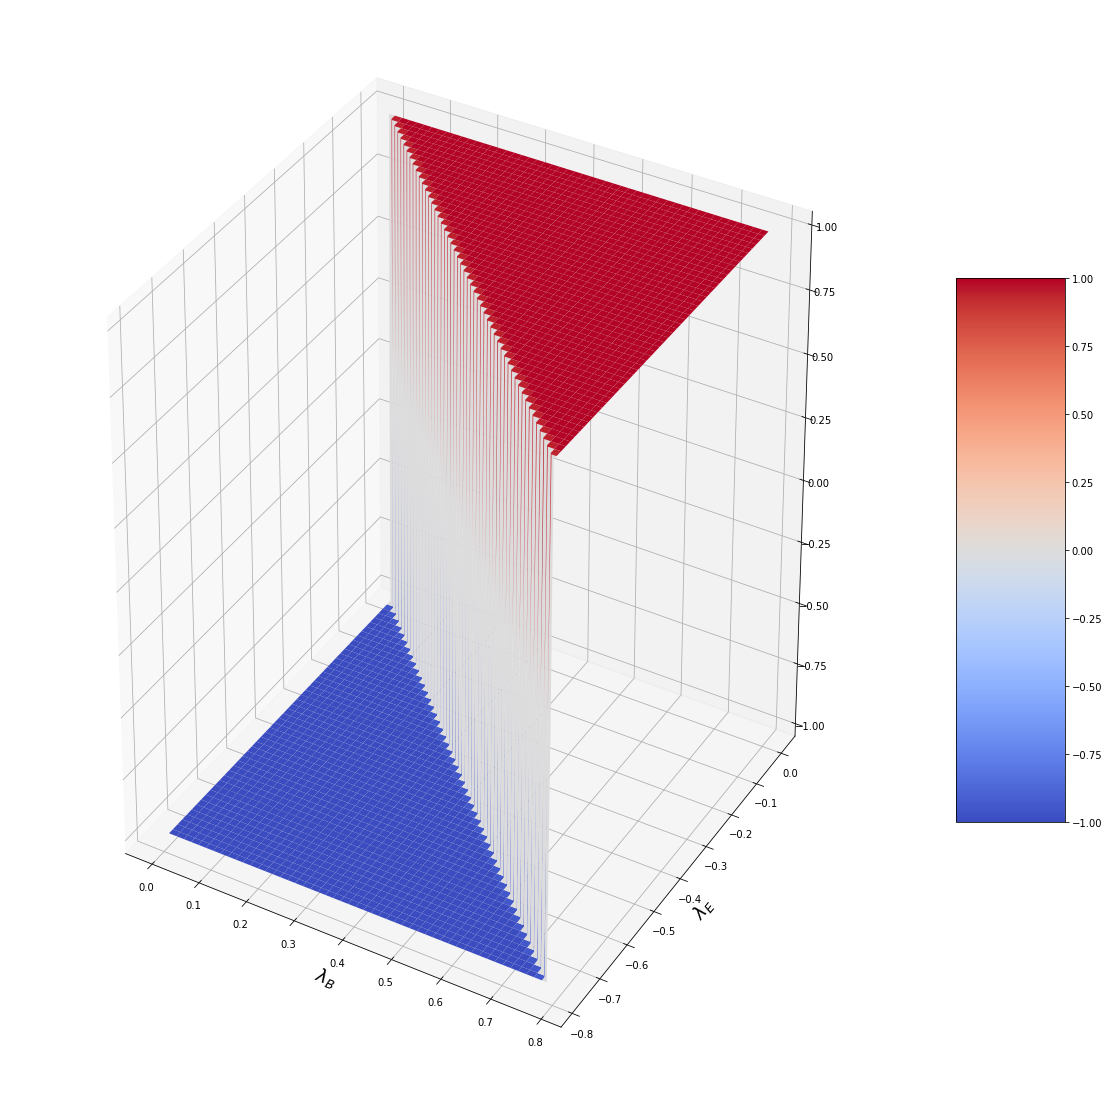

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter, MultipleLocator

Qplot = QuantumGame(1)

fig = plt.figure(figsize=[20,20])
ax = fig.gca(projection='3d')

X = np.arange(0, pi/4, pi/1000)
Y = np.arange(0, -pi/4, -pi/1000)
Z = np.zeros((X.size,Y.size))
sizeX = X.size
sizeY = Y.size
X, Y = np.meshgrid(X, Y)
for i in range(sizeX):
    for j in range(sizeY):
        Qplot.movesB = Q1.createRealMoves([X[i,j]])
        Qplot.movesE = Q1.createRealMoves([Y[i,j]])
        Qplot.calculateOutcome()
        Z[i,j] = Qplot.signedMagQubit(1,0)


# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
# naming the x axis 
plt.xlabel(r'$\lambda_{B}$', fontsize = 18) 
# naming the y axis 
plt.ylabel(r'$\lambda_{E}$', fontsize = 18)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

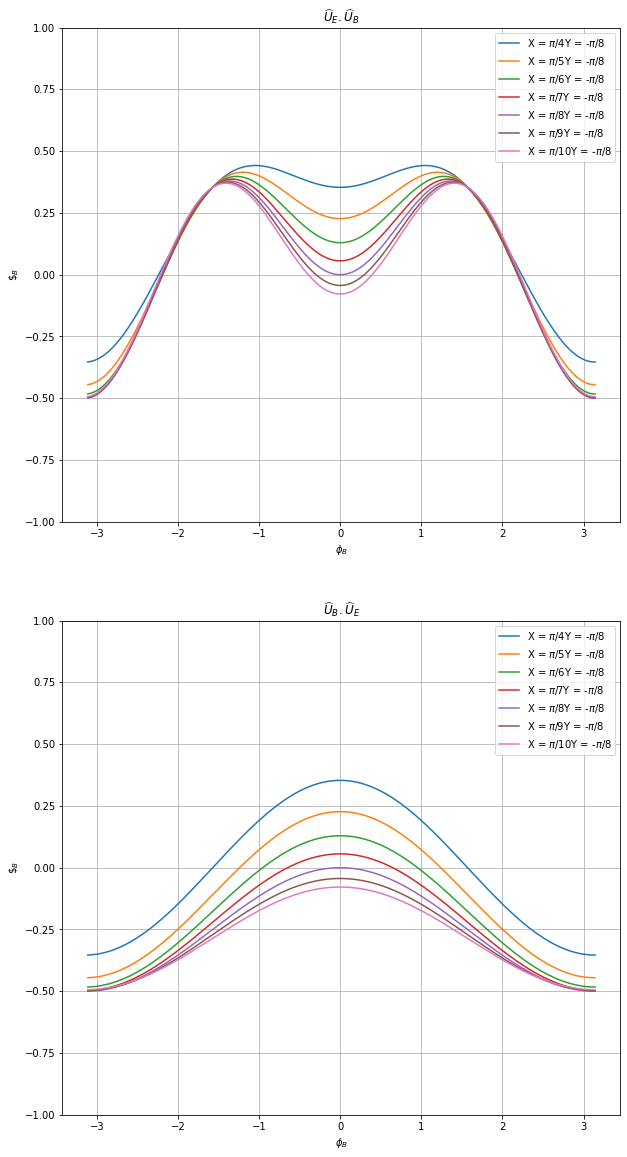

In [51]:
fig, axs = plt.subplots(2, 1, figsize=(10,20))

# Make data.
phi = np.arange(pi, -pi, -pi/100)
for i in np.arange(4, 11):
    Z1 = []
    Z2 = []
    X = pi/i
    Y = -pi/8
    for p in phi:
        Qplot = QuantumGame(1)
        Qplot.movesB = Qplot.createQuantumMoves([[X, p]])
        Qplot.movesE = Qplot.createRealMoves([Y])
        Qplot.calculateOutcome()
        Z1.append(Qplot.magQubit(1,0))
        Qplot.movesB = Qplot.createRealMoves([Y])
        Qplot.movesE = Qplot.createQuantumMoves([[X, p]])
        Qplot.calculateOutcome()
        Z2.append(Qplot.magQubit(1,0))
    Z1 = np.asarray(Z1)
    Z2 = np.asarray(Z2) 
    
    axs[0].plot(phi, Z1, label = "X = " + r"$\pi$/" + str(i) + "Y = -" + r"$\pi$/8")
    axs[0].grid()
    axs[0].set(xlabel=r'$\phi_{B}$', ylabel='$\$_{B}$')
    axs[0].set_ylim(-1,1)
    axs[0].legend()
    axs[0].set_title(r'$\widehat{U}_{E}.\widehat{U}_{B}$')
    
    axs[1].plot(phi, Z2, label = "X = " + r"$\pi$/" + str(i) + "Y = -" + r"$\pi$/8")
    axs[1].grid()
    axs[1].set(xlabel=r'$\phi_{B}$', ylabel='$\$_{B}$')
    axs[1].set_ylim(-1,1)
    axs[1].legend()
    axs[1].set_title(r'$\widehat{U}_{B}.\widehat{U}_{E}$')

# show a legend on the plot
plt.show()

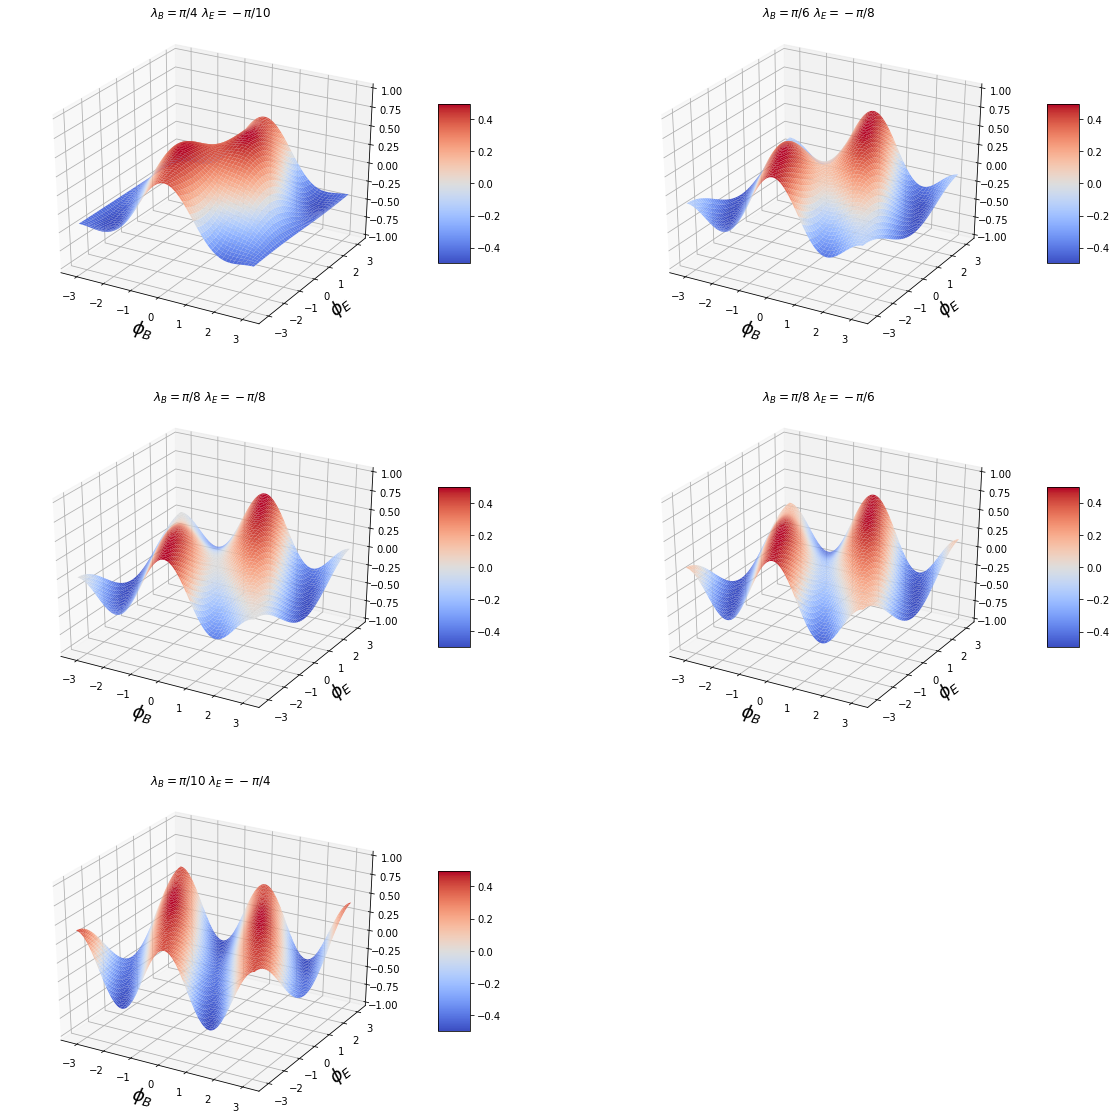

In [52]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter, MultipleLocator

Qplot = QuantumGame(1)

fig = plt.figure(figsize=[20,20])


X = np.arange(-pi, pi, pi/100)
Y = np.arange(-pi, pi, pi/100)
Z = np.zeros((X.size,Y.size))
sizeX = X.size
sizeY = Y.size
X, Y = np.meshgrid(X, Y)

XMoves = [4, 6, 8, 8, 10]
YMoves = [10, 8, 8, 6, 4]

for itr in range(5):
    ax = fig.add_subplot(3, 2, itr+1, projection='3d')
    RealX = pi/XMoves[itr]
    RealY = -pi/YMoves[itr]

    for i in range(sizeX):
        for j in range(sizeY):
            Qplot.movesB = Q1.createQuantumMoves([[RealX, X[i,j]]])
            Qplot.movesE = Q1.createQuantumMoves([[RealY, Y[i,j]]])
            Qplot.calculateOutcome()
            Z[i,j] = Qplot.magQubit(1,0)


    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                        linewidth=0, antialiased=True)

    # Customize the z axis.
    ax.set_zlim(-1.01, 1.01)
    # naming the x axis 
    plt.xlabel(r'$\phi_{B}$', fontsize = 18) 
    # naming the y axis 
    plt.ylabel(r'$\phi_{E}$', fontsize = 18)
    ax.title.set_text(r'$\lambda_{B} = \pi/$'+ str(XMoves[itr]) + r' $\lambda_{E} = -\pi/$' + str(YMoves[itr]))
    fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()